In [ ]:
!pip install pystan==2.19.1.1

In [ ]:
!pip install prophet
from prophet import Prophet

Import Libraries

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

Read DataSet

In [ ]:
df = pd.read_excel(r"C:\Users\Yash\Desktop\ExcelR Project\Codes\RWTCm.xls")
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,Date,COSP
0,1986-01-15,22.93
1,1986-02-15,15.46
2,1986-03-15,12.61
3,1986-04-15,12.84
4,1986-05-15,15.38


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    456 non-null    datetime64[ns]
 1   COSP    456 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.2 KB


# Change Column Names for FB Prophet

In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
451,2023-08-15,81.39
452,2023-09-15,89.43
453,2023-10-15,85.64
454,2023-11-15,77.69
455,2023-12-15,71.90


# Plot Your Data

<Axes: xlabel='ds'>

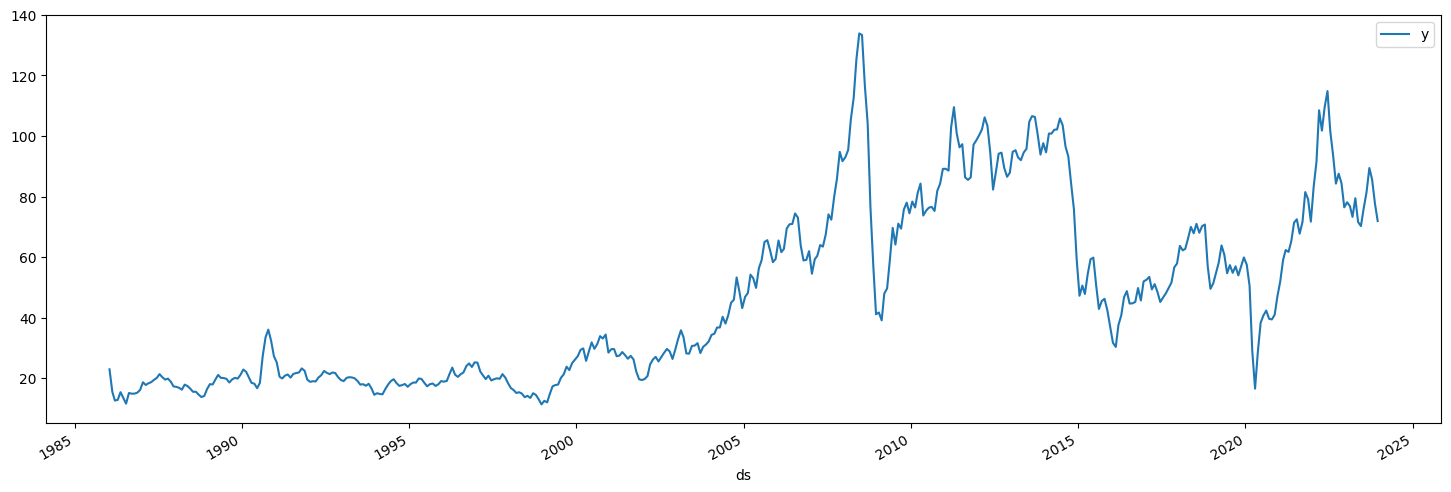

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

456

# Train, Test Split

In [ ]:
train = df.iloc[:len(df)-24]
test = df.iloc[len(df)-24:]

In [ ]:
train.shape

(432, 2)

# Start Making Predictions

In [ ]:
m = Prophet()
m.fit(train)
#future = m.make_future_dataframe(periods=12) #MS for monthly, H for hourly
future = m.make_future_dataframe(24,freq='M') #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9953sdq_/w1_i65ow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9953sdq_/npd4en61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32132', 'data', 'file=/tmp/tmp9953sdq_/w1_i65ow.json', 'init=/tmp/tmp9953sdq_/npd4en61.json', 'output', 'file=/tmp/tmp9953sdq_/prophet_model0r6bawqy/prophet_model-20240127160517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:05:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
451,2023-07-31,40.998847,3.272883,38.198375,40.308516,41.887261,-20.141510,-20.141510,-20.141510,-20.141510,-20.141510,-20.141510,0.0,0.0,0.0,20.857337
452,2023-08-31,40.675572,31.433898,66.395961,39.908692,41.658002,7.571737,7.571737,7.571737,7.571737,7.571737,7.571737,0.0,0.0,0.0,48.247309
453,2023-09-30,40.362726,40.133683,73.896220,39.514448,41.410596,17.353154,17.353154,17.353154,17.353154,17.353154,17.353154,0.0,0.0,0.0,57.715880
454,2023-10-31,40.039451,50.459086,82.728286,39.104287,41.150559,27.155631,27.155631,27.155631,27.155631,27.155631,27.155631,0.0,0.0,0.0,67.195082
455,2023-11-30,39.726604,10.847369,45.154253,38.708282,40.933063,-11.891430,-11.891430,-11.891430,-11.891430,-11.891430,-11.891430,0.0,0.0,0.0,27.835174


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
451,2023-07-31,20.857337,3.272883,38.198375
452,2023-08-31,48.247309,31.433898,66.395961
453,2023-09-30,57.715880,40.133683,73.896220
454,2023-10-31,67.195082,50.459086,82.728286
455,2023-11-30,27.835174,10.847369,45.154253


In [ ]:
test.tail()

,ds,y
451,2023-08-15,81.39
452,2023-09-15,89.43
453,2023-10-15,85.64
454,2023-11-15,77.69
455,2023-12-15,71.90


# USING BUILT-IN FB PROPHET VISUALIZATION
#  

In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

# Evaluate Your Model

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-24:]['yhat']

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  47.93869867945966
Mean Value of Test Dataset: 86.21124999999999
